# Case Study - Lending Club

In [86]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sketch
import os
import warnings

warnings.filterwarnings('ignore')

In [87]:
# Import loan dataset
df = pd.read_csv('loan.csv')

In [89]:
# Let's look into some data
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Know about the initial data

In [90]:
# Let's look into the available columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [91]:
# Try to gather some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [92]:
# We have to see the number of null / missing rows in the dataset for all columns.

issing_or_null_data = df.isnull().sum().sort_values(ascending=False)
missing_or_null_data_percentage = ((missing_or_null_data / len(df)) * 100)
missing_or_null_data[missing_or_null_data_percentage > 0]

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
Length: 68, dtype: int64

# Now we need to clean the data

* Remove the columns which has more than 60% of rows as null or empty.
* fill missing values with median for numerical data
* fill missing values with mode for categorical values

In [93]:
# drop columns which has above 60% null / empty rows.
df.dropna(thresh=int(0.6 * len(df)), axis=1, inplace=True)

In [94]:
# Now, check how many columns are remaining
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [95]:
# do we still have some missing values ?
df.isnull().sum().sort_values(ascending=False)

desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
total_rec_prncp                   0
out_prncp                         0
initial_list_status               0
out_prncp_inv                     0
total_acc                         0
total_pymnt                       0
total_pymnt_inv                   0
collection_recovery_fee           0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
pub_rec                           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq                    0
delinq_amnt                 

In [96]:
# As we can see, we still have few columns with missing rows.
# First, we have to handle the numerical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [97]:
# We have numerical columns with us, we can now fill missing values with median of all the data values.
# I am saying, take those numerical columns and fill the missing value with median of all the data in that column.
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [98]:
# Now, let's see how many missing values we have after this operations
df[numerical_columns].isnull().sum().sort_values(ascending=False)

id                            0
total_pymnt                   0
pub_rec_bankruptcies          0
delinq_amnt                   0
chargeoff_within_12_mths      0
acc_now_delinq                0
policy_code                   0
collections_12_mths_ex_med    0
last_pymnt_amnt               0
collection_recovery_fee       0
recoveries                    0
total_rec_late_fee            0
total_rec_int                 0
total_rec_prncp               0
total_pymnt_inv               0
out_prncp_inv                 0
member_id                     0
out_prncp                     0
total_acc                     0
revol_bal                     0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
delinq_2yrs                   0
dti                           0
annual_inc                    0
installment                   0
funded_amnt_inv               0
funded_amnt                   0
loan_amnt                     0
tax_liens                     0
dtype: i

In [99]:
# Now, let's check the categorical data.
# Handle categorical columns first.
cat_columns = df.select_dtypes(include=[object]).columns
cat_columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [100]:
# Let's see what unique values do they have
df[cat_columns].nunique()

term                       2
int_rate                 371
grade                      7
sub_grade                 35
emp_title              28820
emp_length                11
home_ownership             5
verification_status        3
issue_d                   55
loan_status                3
pymnt_plan                 1
url                    39717
desc                   26526
purpose                   14
title                  19615
zip_code                 823
addr_state                50
earliest_cr_line         526
revol_util              1089
initial_list_status        1
last_pymnt_d             101
last_credit_pull_d       106
application_type           1
dtype: int64

In [101]:
# Let's see how much missing values each categorical column has
df[cat_columns].isnull().sum().sort_values(ascending=False)

desc                   12942
emp_title               2459
emp_length              1075
last_pymnt_d              71
revol_util                50
title                     11
last_credit_pull_d         2
term                       0
purpose                    0
initial_list_status        0
earliest_cr_line           0
addr_state                 0
zip_code                   0
url                        0
int_rate                   0
pymnt_plan                 0
loan_status                0
issue_d                    0
verification_status        0
home_ownership             0
sub_grade                  0
grade                      0
application_type           0
dtype: int64

In [102]:
# Fill the missing categorical data with mode of category.
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [103]:
# Let's verify, we don't have any missing values
df[cat_columns].isnull().sum()

term                   0
int_rate               0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
url                    0
desc                   0
purpose                0
title                  0
zip_code               0
addr_state             0
earliest_cr_line       0
revol_util             0
initial_list_status    0
last_pymnt_d           0
last_credit_pull_d     0
application_type       0
dtype: int64

In [104]:
# Now let's see the data type of each columns.
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [105]:
# we have three dates columns - [issue_d, last_pymnt_d, last_credit_pull_d]
# let's see their date format, do we need to convert it into proper format ?
df[['issue_d', 'last_pymnt_d', 'last_credit_pull_d']].head(2)

,issue_d,last_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-15,May-16
1,Dec-11,Apr-13,Sep-13


In [106]:
# we need to convert them into proper date format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

# verify the changes
df[['issue_d', 'last_pymnt_d', 'last_credit_pull_d']].head(2)

,issue_d,last_pymnt_d,last_credit_pull_d
0,2011-12-01,2015-01-01,2016-05-01
1,2011-12-01,2013-04-01,2013-09-01


In [107]:
# now let's look into the data, see if something else is needed
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [108]:
# Upon seeing the data, i can see int_rate has '%' in the data, which might affect the calculations, since interest
# rate are usually in float format, we have to convert the data as well.
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(np.float64)
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [109]:
# Upon seeing the data, i can see term has 'months' in the data, which might affect the calculations, since term represents
# months in integer format, we can exclude 'months' and convert it into integer format.
df['term'] = df['term'].str.replace(' months', '').astype(np.int64)
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [110]:
# Our data is now mostly clean and usable, let do statistical analysis ?
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,issue_d,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717,...,39717,39717.000000,39717,39717.0,39717.0,39717.0,39717.0,39717.0,39717.000000,39717.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,2010-11-03 23:26:45.166553344,...,2013-04-12 05:27:10.727396608,2678.826162,2014-09-07 19:59:43.684568576,0.0,1.0,0.0,0.0,0.0,0.042501,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,2007-06-01 00:00:00,...,2008-01-01 00:00:00,0.000000,2007-05-01 00:00:00,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,2010-05-01 00:00:00,...,2012-04-01 00:00:00,218.680000,2013-06-01 00:00:00,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,2011-02-01 00:00:00,...,2013-04-01 00:00:00,546.140000,2015-03-01 00:00:00,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,2011-08-01 00:00:00,...,2014-06-01 00:00:00,3293.160000,2016-05-01 00:00:00,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,2011-12-01 00:00:00,...,2016-05-01 00:00:00,36115.200000,2016-05-01 00:00:00,0.0,1.0,0.0,0.0,0.0,2.000000,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,NaN,...,NaN,4447.136012,NaN,0.0,0.0,0.0,0.0,0.0,0.202603,0.0


# Now, let's try to find the importance of the remaining columns and our expectation from this dataset

In [111]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [112]:
# Let's save the data for further observations from the data.
df.to_csv('loan_cleaned.csv')

# Upon careful observation, i can summerize the columns and categorize them as below:

1. Loan Details
These columns contain information about the loan itself and will likely be very useful for identifying factors that influence default.

* loan_amnt: The total loan amount. Larger loans might have higher risk.
* funded_amnt: The actual amount funded by the lender.
* int_rate: Interest rate of the loan. Higher interest rates could be linked to higher default rates, as it might    indicate higher risk or less favorable conditions for the borrower.
* installment: The monthly repayment amount. Larger installments could increase the risk of default, especially if the borrower’s income is low.
* term: The term of the loan (e.g., 36 months, 60 months). Longer terms may lead to higher default risk due to longer commitment periods.
* grade & sub_grade: Loan grades (A, B, C, etc.) and sub-grades. These grades usually represent the loan's risk * profile and can be crucial in understanding which grade of loans defaults more.
* purpose: The purpose of the loan (e.g., debt consolidation, medical expenses, etc.). Certain loan purposes may be riskier than others.

2. Borrower Information
Demographic and financial details about the borrower can also be key in identifying risky applicants.

* annual_inc: Annual income of the borrower. Lower income could indicate a higher risk of default, especially if the borrower’s debt-to-income ratio is high.
* home_ownership: Whether the borrower owns a home or rents. Homeownership is generally a positive indicator, as homeowners might have more stability.
* emp_length: The length of time the borrower has been employed. Longer employment could correlate with financial stability.
* verification_status: Whether the borrower’s income was verified. Unverified income could be a higher risk factor.

3. Credit History
The borrower's previous credit history and behavior are strong predictors of their likelihood to default.

* delinq_2yrs: Number of delinquencies in the past 2 years. More delinquencies can indicate higher credit risk and a higher chance of default.
* earliest_cr_line: The age of the borrower’s earliest credit line. A longer credit history could indicate more financial experience and stability.
* inq_last_6mths: Number of inquiries made by other creditors in the last 6 months. Frequent inquiries could signal financial distress or the borrower looking for more credit.
* open_acc: The number of open accounts. More open accounts might indicate greater financial responsibility or higher financial strain.
* pub_rec: Number of public records (e.g., bankruptcies). This is a strong indicator of potential default risk.
* revol_bal: Revolving balance, which reflects how much credit the borrower is using compared to their available limit. High revolving balances can indicate a borrower struggling to manage their credit.
* revol_util: Revolving utilization rate. A higher utilization rate could indicate financial stress, increasing default risk.

4. Loan Repayment Details
How the borrower is performing with regard to repayments is essential for predicting future defaults.

* total_pymnt: Total payment made by the borrower. If payments are lower than expected, it could indicate financial strain.
* total_rec_prncp: The total principal received. If this is low relative to the loan amount, it could suggest that the borrower is not keeping up with payments.
* total_rec_int: The total interest received. This shows how much interest is being paid, which could reflect the loan's performance.
* recoveries: Amount recovered from a loan. If this is high, it could indicate the bank is recovering losses from defaulted loans, which could be worth analyzing further.
* chargeoff_within_12_mths: Whether the loan was charged off in the last 12 months. This column directly indicates whether the loan defaulted.

5. Target Variable
* loan_status: This is the most important column as it indicates whether the borrower has defaulted (charged-off) or not. It is the target variable you'll be predicting.

# Let's now plot some chart's to gather meaningfull information out the dataset.

## Let's first try to perform univariate analysis.

After careful observations from the columns and thier impact of analysis. We can conclude some of the columns and create list of useful columns as below.

In [113]:
df = df[['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'recoveries', 'term', 'grade',
 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 
 'addr_state', 'application_type', 'issue_d']]

In [114]:
df.head(5)

,id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,recoveries,term,grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,application_type,issue_d
0,1077501,5000,5000,10.65,162.87,24000.0,27.65,0.00,36,B,US Army,10+ years,RENT,Verified,Fully Paid,n,credit_card,AZ,INDIVIDUAL,2011-12-01
1,1077430,2500,2500,15.27,59.83,30000.0,1.00,117.08,60,C,Ryder,< 1 year,RENT,Source Verified,Charged Off,n,car,GA,INDIVIDUAL,2011-12-01
2,1077175,2400,2400,15.96,84.33,12252.0,8.72,0.00,36,C,US Army,10+ years,RENT,Not Verified,Fully Paid,n,small_business,IL,INDIVIDUAL,2011-12-01
3,1076863,10000,10000,13.49,339.31,49200.0,20.00,0.00,36,C,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Fully Paid,n,other,CA,INDIVIDUAL,2011-12-01
4,1075358,3000,3000,12.69,67.79,80000.0,17.94,0.00,60,B,University Medical Group,1 year,RENT,Source Verified,Current,n,other,OR,INDIVIDUAL,2011-12-01


In [115]:
# Let's perform statistical analysis.
df.describe()

,id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,recoveries,term,issue_d
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717
mean,6.831319e+05,11219.443815,10947.713196,12.021177,324.561922,6.896893e+04,13.315130,95.221624,42.418007,2010-11-03 23:26:45.166553344
min,5.473400e+04,500.000000,500.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,36.000000,2007-06-01 00:00:00
25%,5.162210e+05,5500.000000,5400.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,36.000000,2010-05-01 00:00:00
50%,6.656650e+05,10000.000000,9600.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,36.000000,2011-02-01 00:00:00
75%,8.377550e+05,15000.000000,15000.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,60.000000,2011-08-01 00:00:00
max,1.077501e+06,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,29623.350000,60.000000,2011-12-01 00:00:00
std,2.106941e+05,7456.670694,7187.238670,3.724825,208.874874,6.379377e+04,6.678594,688.744771,10.622815,NaN


In [116]:
# Extract numerical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'recoveries', 'term'],
      dtype='object')

In [117]:
# Extract categorical columns.
categorical_columns = df.select_dtypes(include = [object]).columns
categorical_columns

Index(['grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'application_type'],
      dtype='object')

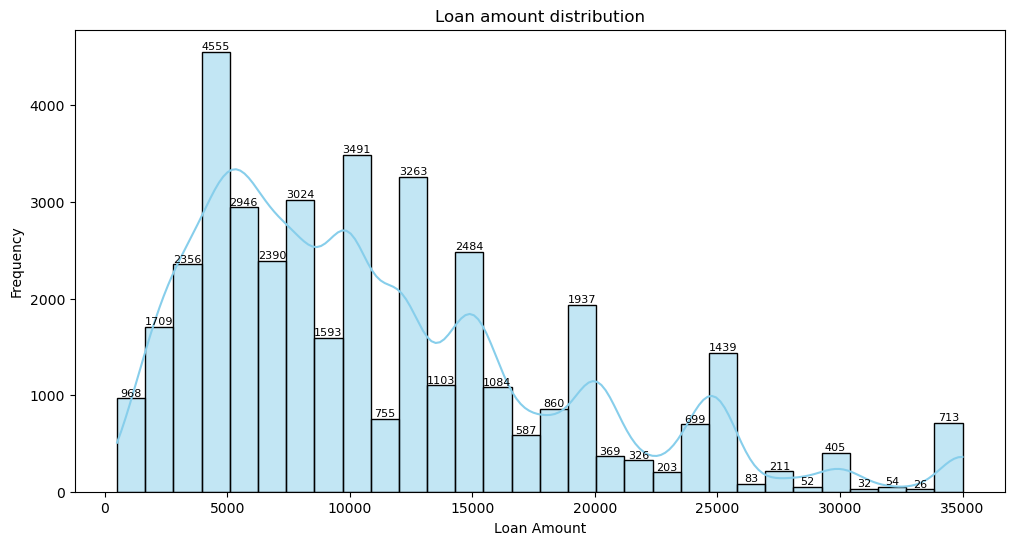

In [119]:
# Let's first try to understand the loan amount distribution and Kernal Density for better understanding.
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df['loan_amnt'], bins=30, kde=True, color='skyblue', edgecolor='black')

# want to show the total loan distribution on the top of the bar for better readability
for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    
    # Add text label on top of each bar
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{int(height)}',
            ha='center', va='bottom', fontsize=8, fontweight='normal',
            color='black')

ax.set_xlabel('Loan Amount')
ax.set_ylabel('Frequency')
ax.set_title('Loan amount distribution')

plt.show()

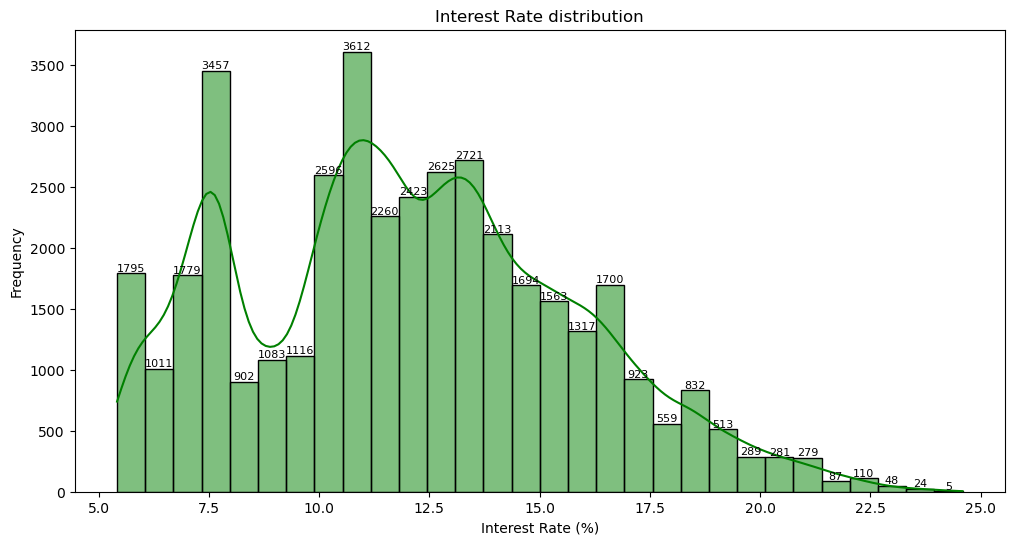

In [120]:
# Interest Rate distribution
# Let's first try to understand the loan amount distribution
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df['int_rate'], bins=30, kde=True, color='green', edgecolor='black')

# want to show the percentage distribution on the top of the bar for better readability
for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    
    # Add text label on top of each bar
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{int(height)}',
            ha='center', va='bottom', fontsize=8, fontweight='normal',
            color='black')

ax.set_xlabel('Interest Rate (%)')
ax.set_ylabel('Frequency')
ax.set_title('Interest Rate distribution')

plt.show()

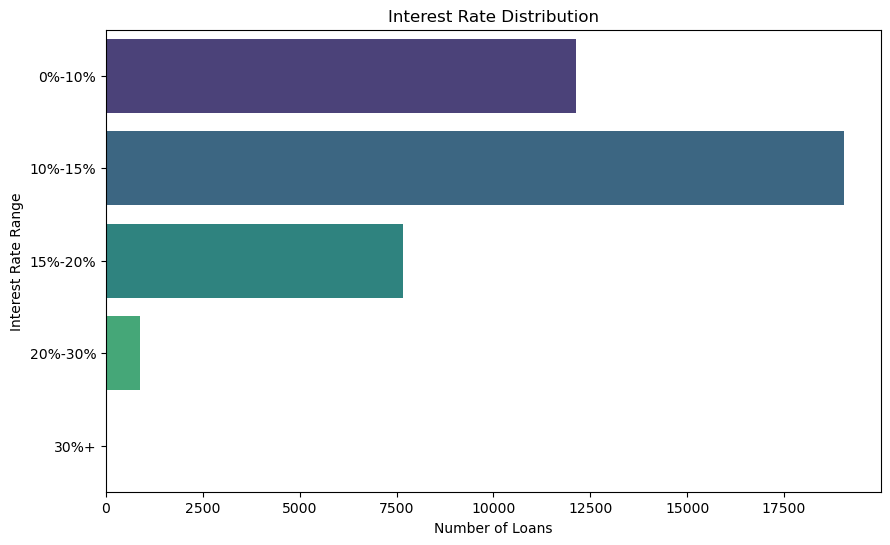

In [128]:
# Define interest rate bins (e.g., 0%-10%, 10%-15%, 15%-20%, etc.)
bins = [0, 10, 15, 20, 30, 100]  # Binning interest rates into ranges
labels = ['0%-10%', '10%-15%', '15%-20%', '20%-30%', '30%+']

# Create a new column to store the bin labels
df['int_rate_bins'] = pd.cut(df['int_rate'], bins=bins, labels=labels, right=False)

# Count the frequency of each bin
rate_distribution = df['int_rate_bins'].value_counts()

# Plotting the Horizontal Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=rate_distribution.values, y=rate_distribution.index, palette='viridis')


plt.xlabel('Number of Loans')
plt.ylabel('Interest Rate Range')
plt.title('Interest Rate Distribution')
plt.show()

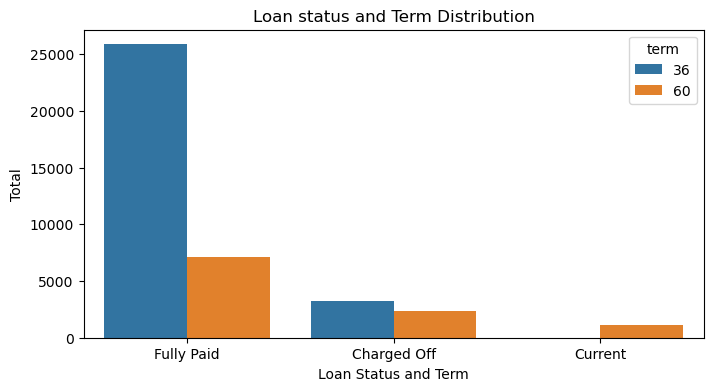

In [129]:
# Let's perform univariant analysis on loan status with hue = 'term', we want to see the loan status with respect
# to the term.

plt.figure(figsize=(8, 4))
ax = sns.countplot(x='loan_status', hue='term', data=df)

ax.set_xlabel('Loan Status and Term')
ax.set_ylabel('Total')
ax.set_title('Loan status and Term Distribution')

plt.show()

# Let's try to understand the data by performing bivariate analysis.

<Figure size 1400x800 with 0 Axes>

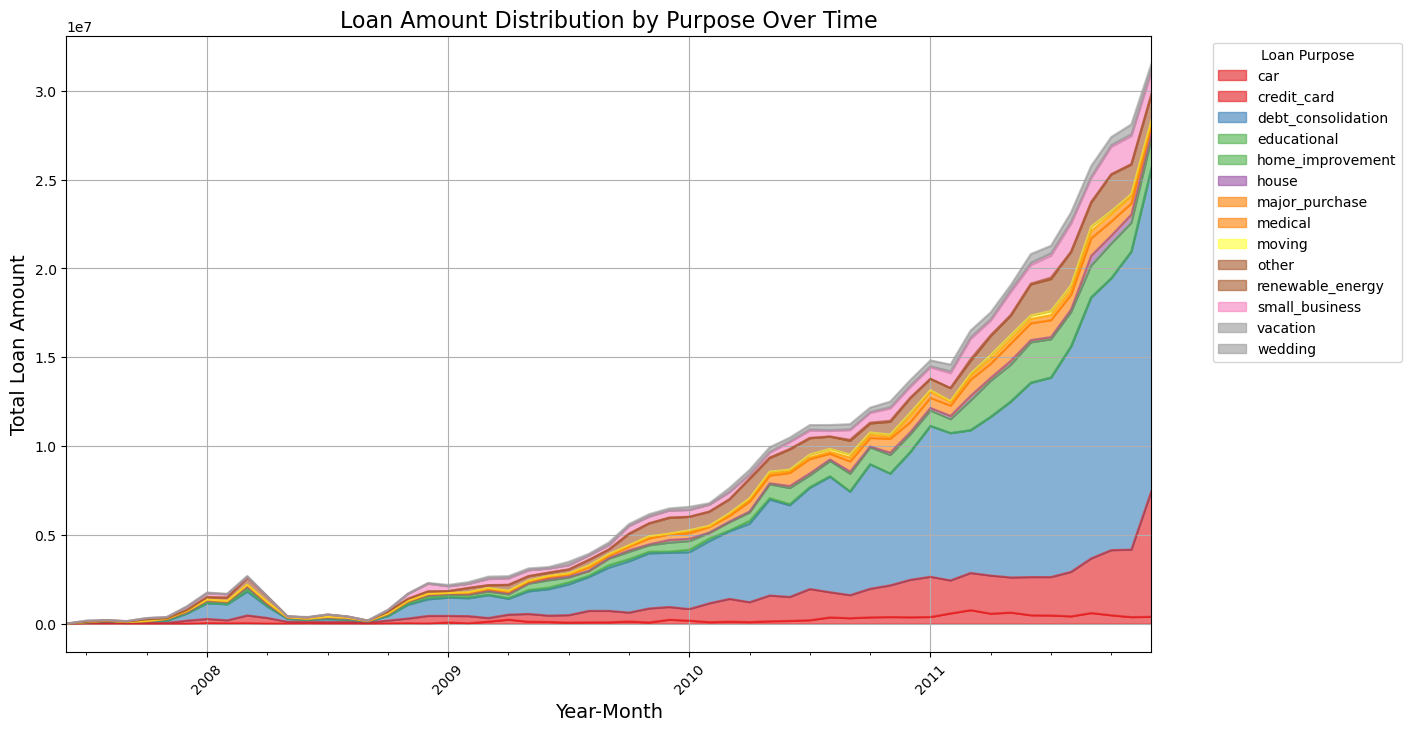

In [130]:
# Let's try to understand the bivariate analysis over loan amount, purpose of the loan and see the growth area over time.
# Group by year and loan purpose to see total loan amount by each purpose over time

loan_by_purpose_time = df.groupby([df['issue_d'].dt.to_period('M'), 'purpose'])['loan_amnt'].sum().unstack()

# Plotting the stacked area chart
plt.figure(figsize=(14, 8))

loan_by_purpose_time.plot(kind='area', stacked=True, figsize=(14, 8), cmap='Set1', alpha=0.6)

plt.title('Loan Amount Distribution by Purpose Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Loan Amount', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Loan Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

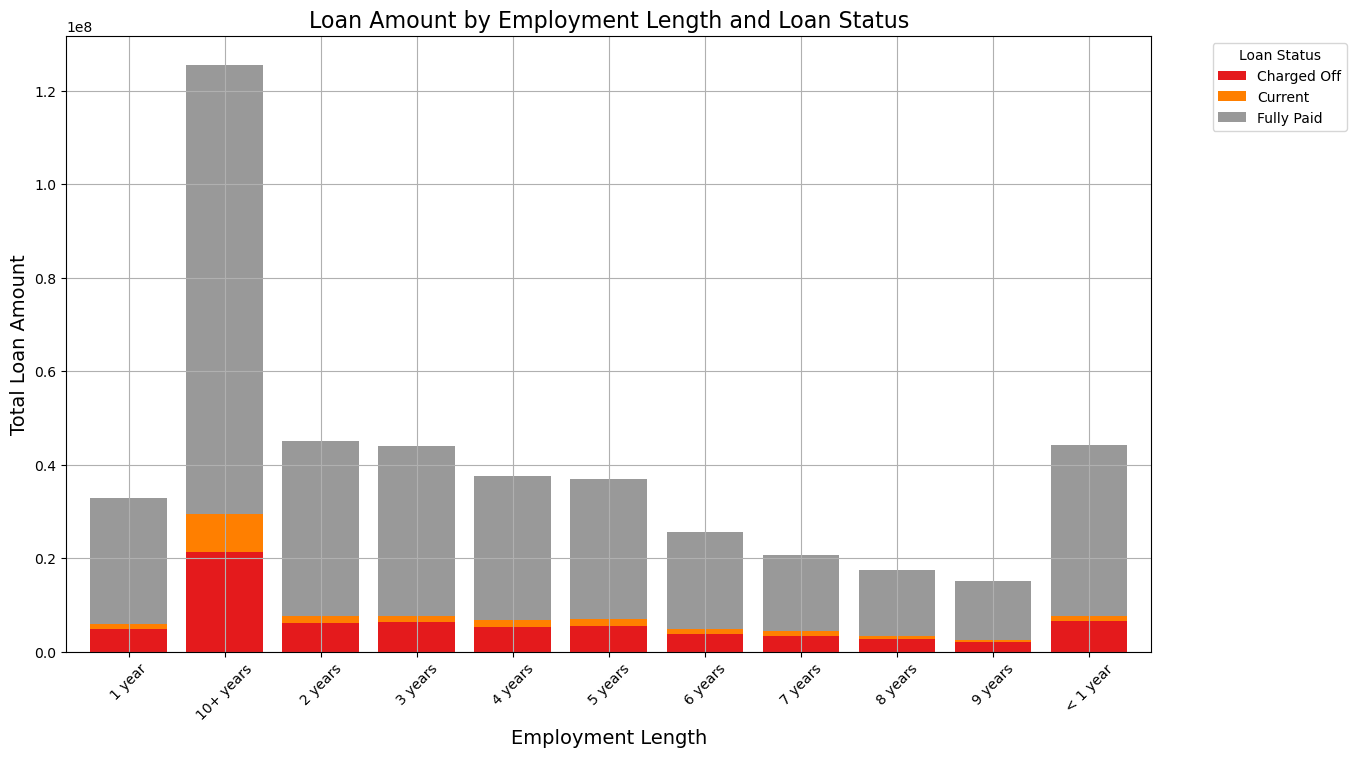

In [131]:
# How employment lenght is contributing the loan status, does higher experience / employment lenght affect the loan closure ?
# Grouping by employment length and loan status, summing the loan amount
loan_by_emp_status = df.groupby(['emp_length', 'loan_status'])['loan_amnt'].sum().unstack()

# Plotting the stacked bar plot
plt.figure(figsize=(14, 8))

# Create a stacked bar plot
loan_by_emp_status.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='Set1', width=0.8)

# Adding title and labels
plt.title('Loan Amount by Employment Length and Loan Status', fontsize=16)
plt.xlabel('Employment Length', fontsize=14)
plt.ylabel('Total Loan Amount', fontsize=14)

# Rotating x-axis labels for readability
plt.xticks(rotation=45)

# Show legend outside the plot for clarity
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()

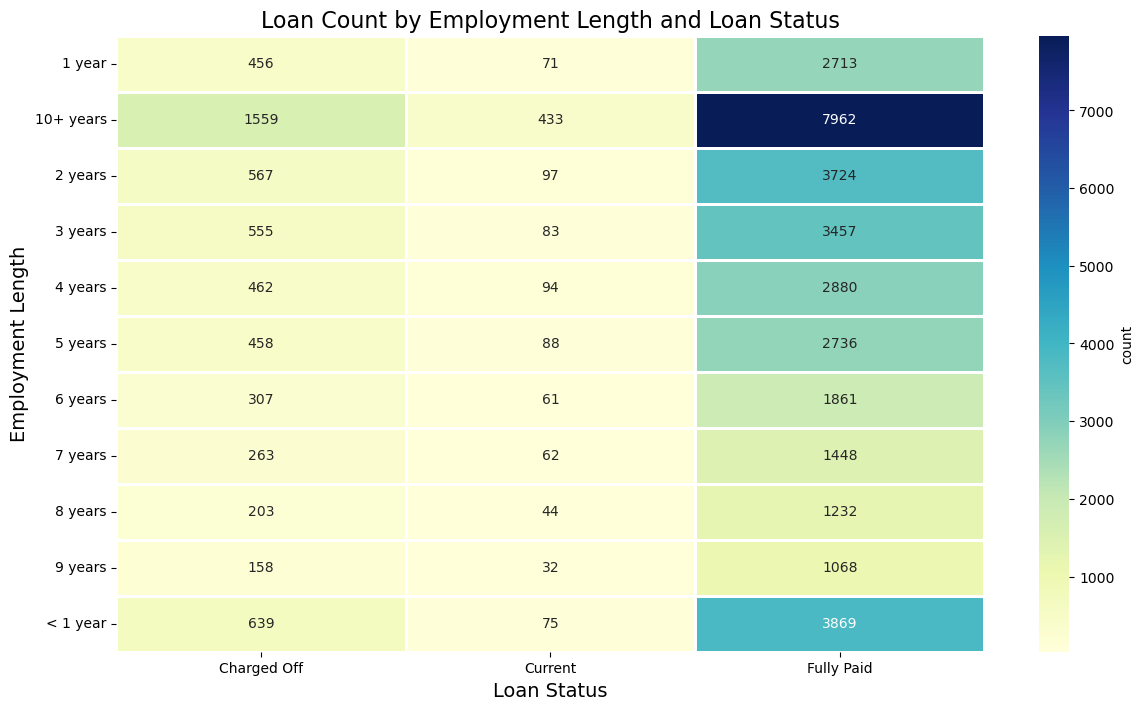

In [135]:
# We can also create an interesting analysis between employment lenght, loan status and count.
# We can create a pivot table and utilize that data to show the total number of loans closed, charged off or current
# on the basis of employment lenght.

# Create a pivot table with employment length as rows, loan status as columns, and loan amount as values
loan_pivot = df.pivot_table(index='emp_length', columns='loan_status', values='loan_amnt', aggfunc='count')

# Plotting the heatmap
plt.figure(figsize=(14, 8))

# Generate the heatmap
sns.heatmap(loan_pivot, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'count'}, linewidths=1)

# Adding title and labels
plt.title('Loan Count by Employment Length and Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Employment Length', fontsize=14)

# Show the plot
plt.show()

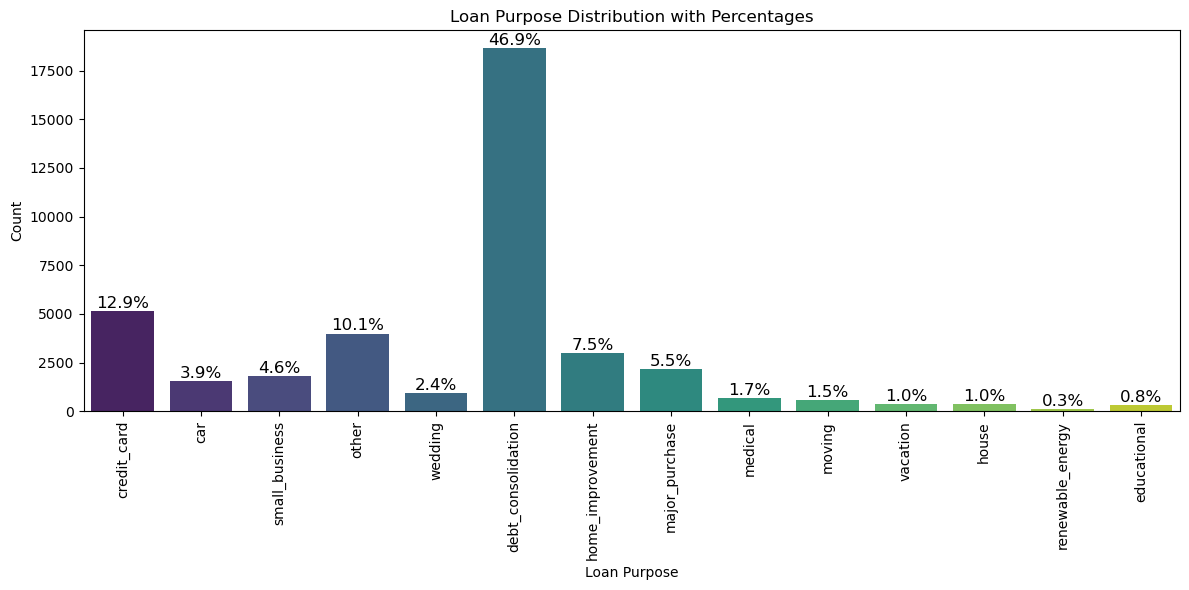

In [50]:
# Interestingly, we can also try to see the relation between loan distribution by purpose, what is the percentage
# amont different loan purposes, which one dominate :)

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='purpose', data=df, palette='viridis')

total_count = len(df)

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    
    ax.text(p.get_x() + p.get_width() / 2, height + 2, f'{percentage:.1f}%',
            ha='center', va='bottom', fontsize=12)

plt.title('Loan Purpose Distribution with Percentages')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

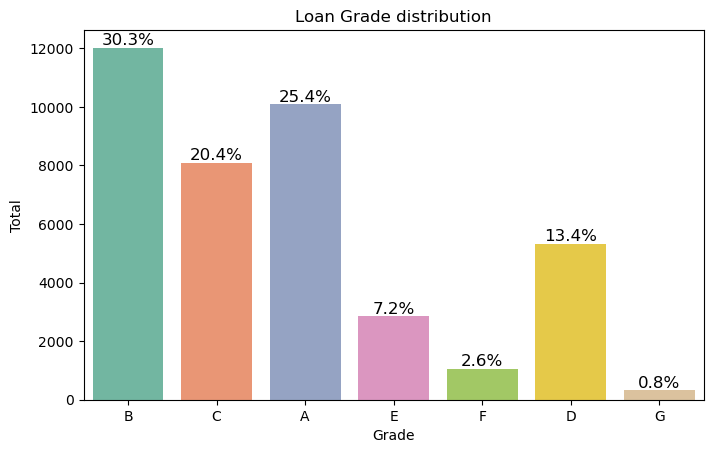

In [52]:
# Let's first try to understand the loan amount distribution between different Grades (A,B,C,D,E,F) which one 
# contirubute higher ?

plt.figure(figsize=(8, 4.8))
ax = sns.countplot(x='grade', data=df, palette='Set2')

total_count = len(df)

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    
    ax.text(p.get_x() + p.get_width() / 2, height + 2, f'{percentage:.1f}%',
            ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Grade')
ax.set_ylabel('Total')
ax.set_title('Loan Grade distribution')

plt.show()

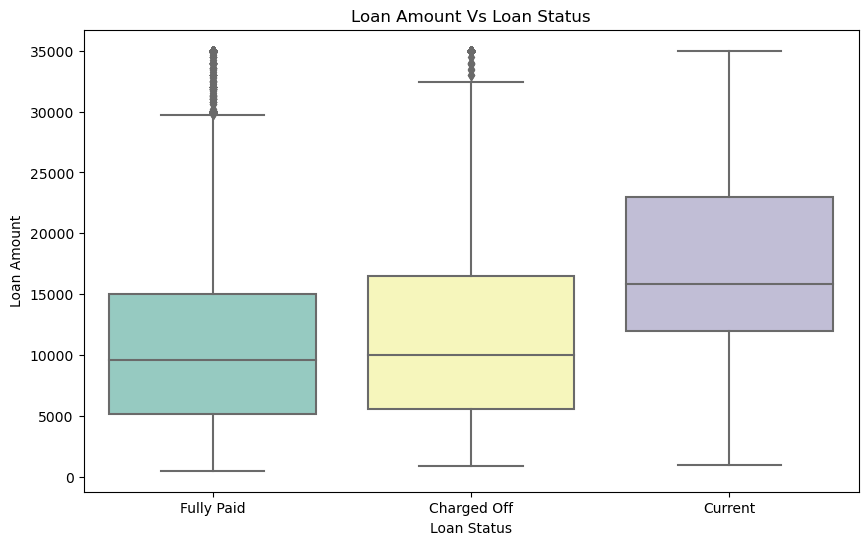

In [53]:
# Now let's perform bivariate analysis based on Loan amount and loan status. try to find out the outliers ?

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='Set3')

plt.title('Loan Amount Vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

plt.show()

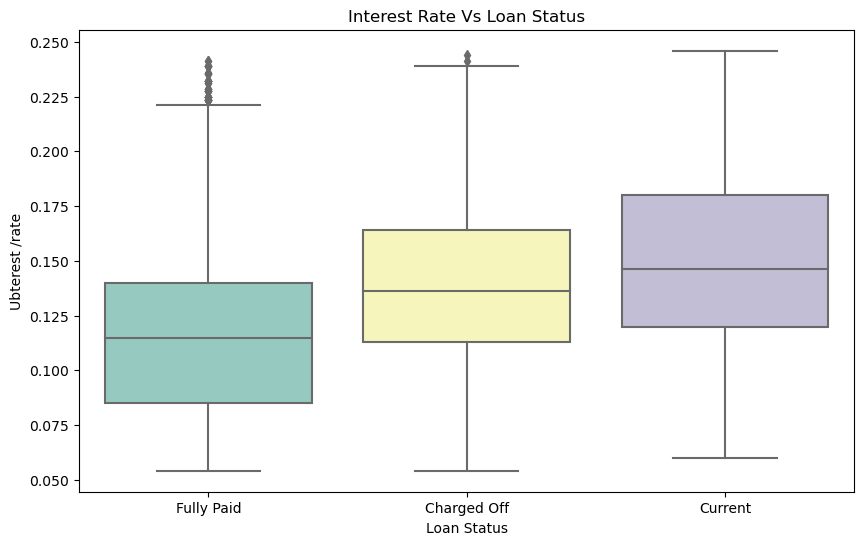

In [54]:
# Now let's perform bivariate analysis based on loan status and interest rates. try to find out the outliers ?

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=df, palette='Set3')

plt.title('Interest Rate Vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Ubterest /rate')

plt.show()

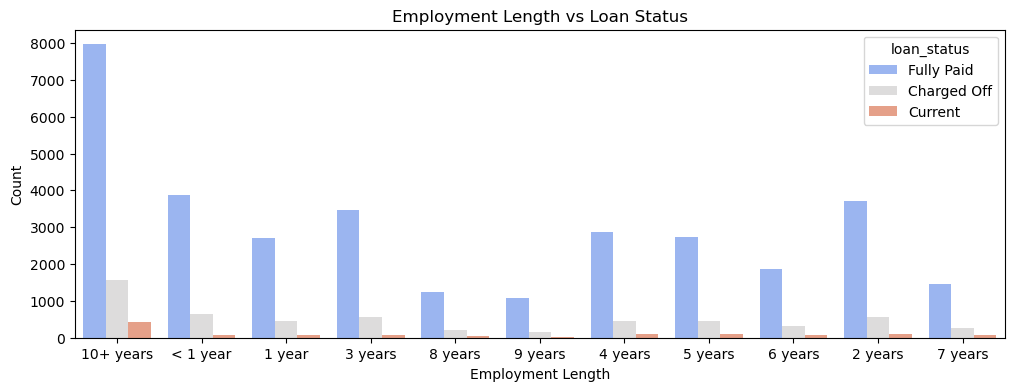

In [55]:
# We can also create interesting analysis based on employment lenght and loan status, which category pays off and
# which doesn't

plt.figure(figsize=(12, 4))
sns.countplot(x='emp_length', hue='loan_status', data=df, palette='coolwarm')
plt.title('Employment Length vs Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.show()

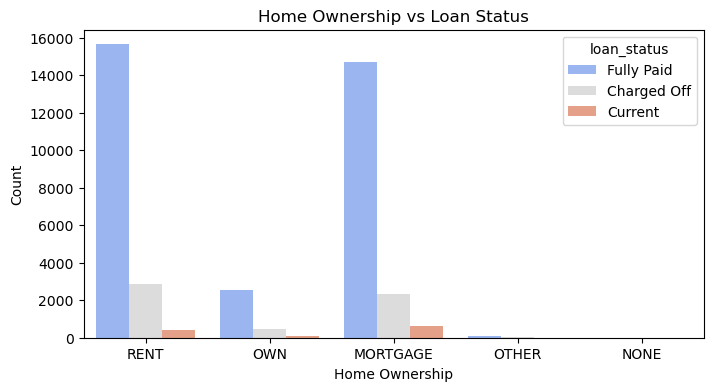

In [138]:
# Does home ownership plays any role in loan status ?

plt.figure(figsize=(8, 4))
sns.countplot(x='home_ownership', hue='loan_status', data=df, palette='coolwarm')
plt.title('Home Ownership vs Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

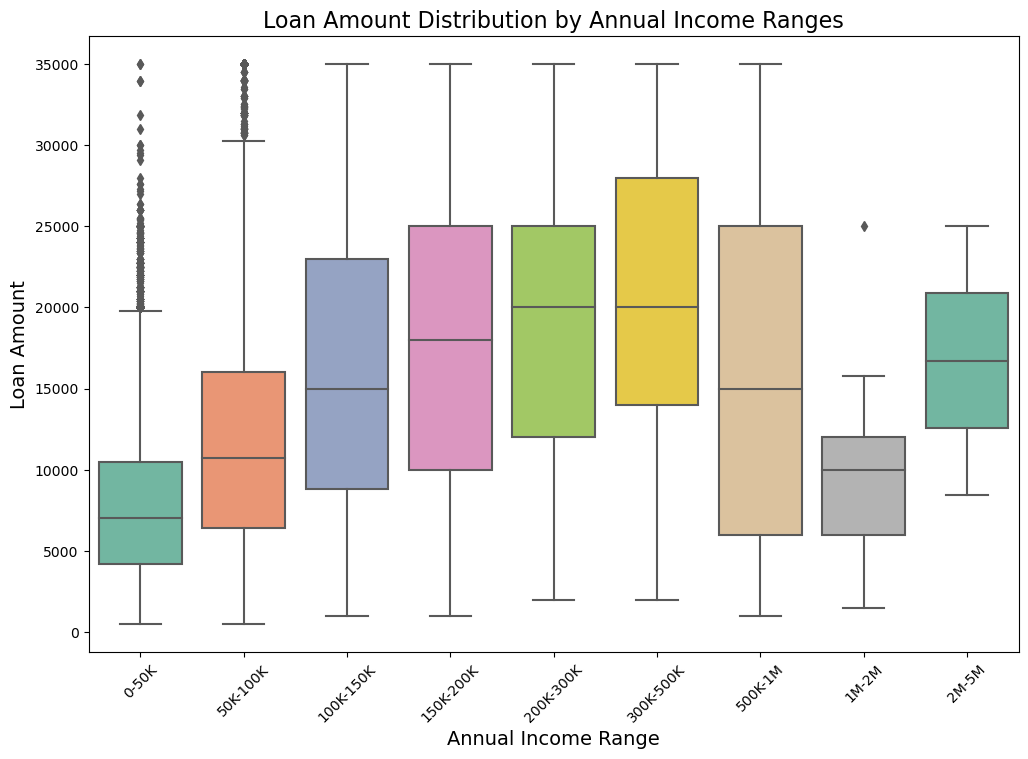

In [139]:
# We can also try to see the relation between annual income of members and loan amount, how is the distribution?
# are there any outliers ?

# Create income bins for grouping
bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000, 2000000, 5000000]
labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K-300K', '300K-500K', '500K-1M', '1M-2M', '2M-5M']
df['income_range'] = pd.cut(df['annual_inc'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))

# Boxplot for loan amount by income range
sns.boxplot(data=df, x='income_range', y='loan_amnt', palette='Set2')

plt.title('Loan Amount Distribution by Annual Income Ranges', fontsize=16)
plt.xlabel('Annual Income Range', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Find out correlation.

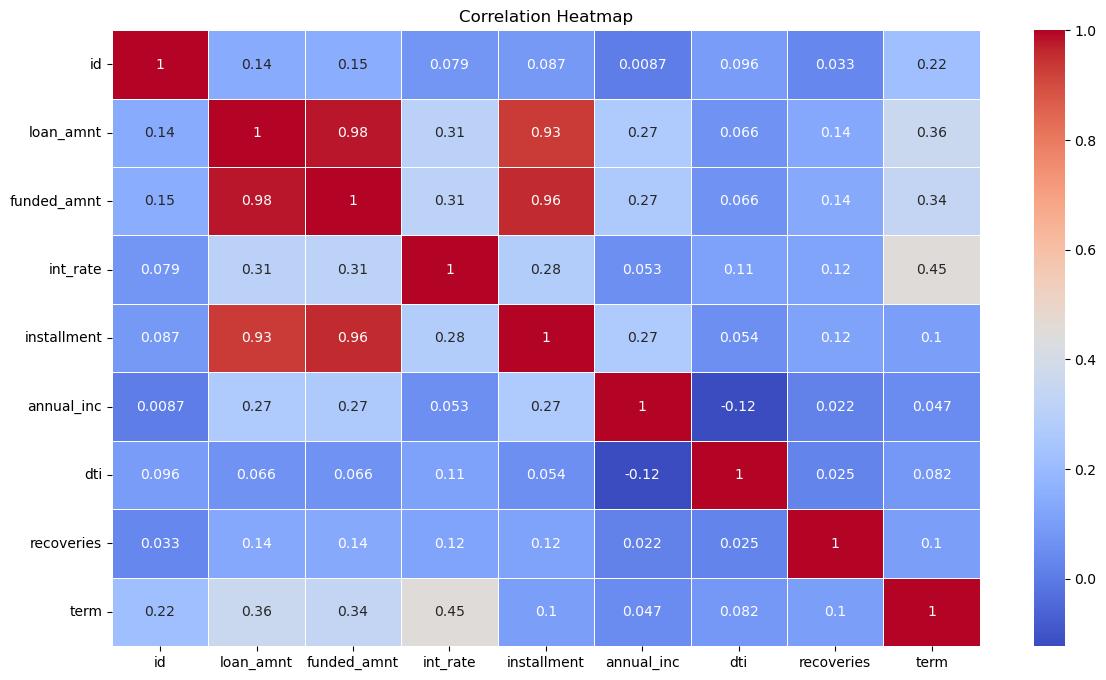

In [59]:
# Correlation between Continuous Variables
# Correlation Heatmap for numerical features

plt.figure(figsize=(14, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()

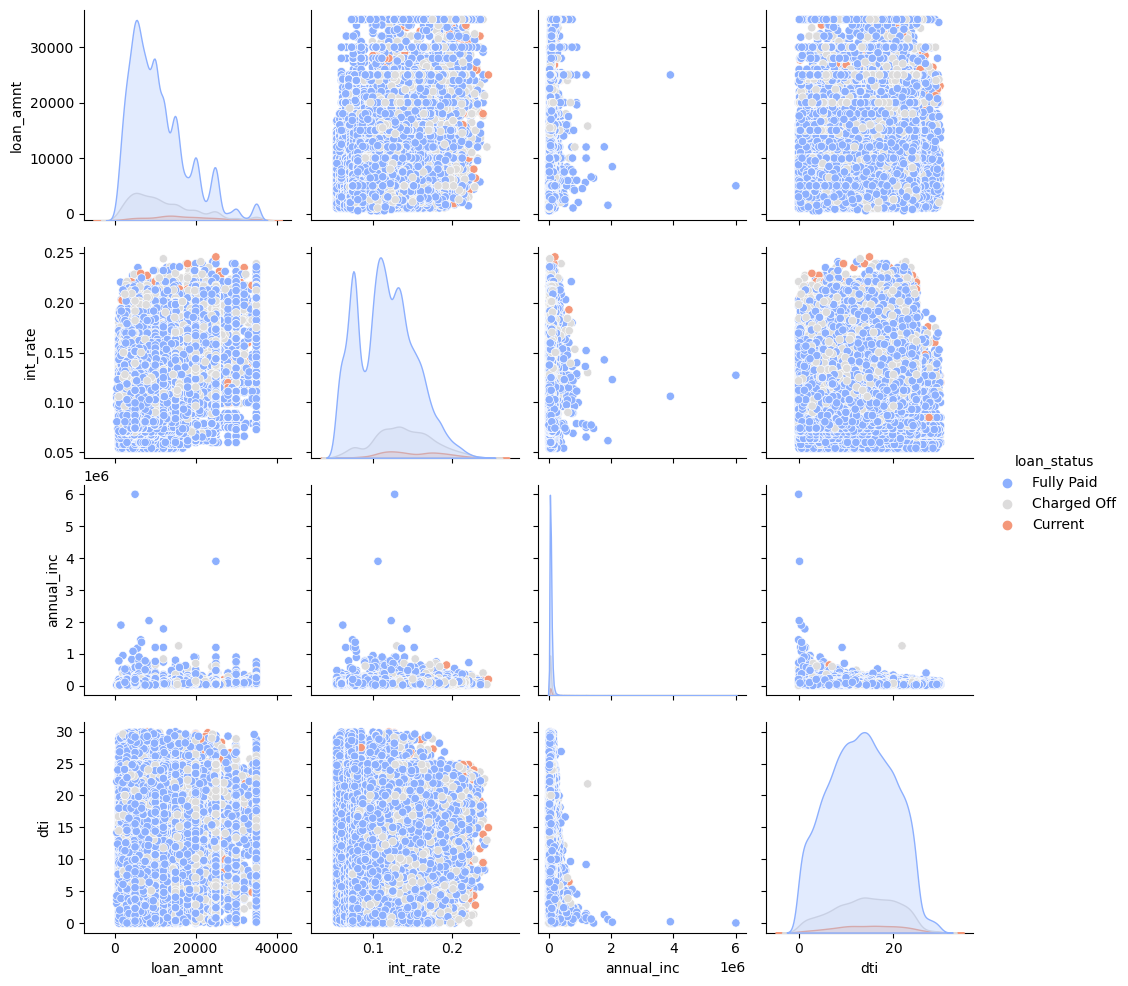

In [60]:
# By identifying the important features, we can try to create a pair plot to see the impact of different features
# on loan status ?

sns.pairplot(df[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_status']], hue='loan_status', palette='coolwarm')
plt.show()

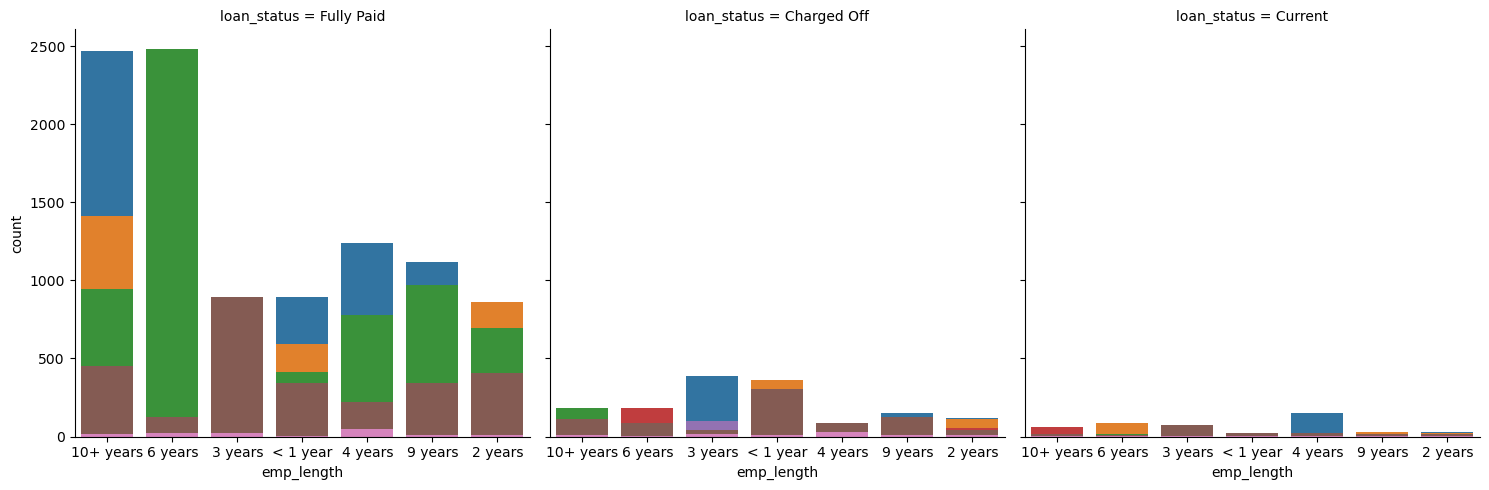

In [63]:
# Let's see which grade falls under which employment length category ?

g = sns.FacetGrid(df, col='loan_status', hue='grade', height=5)
g.map(sns.countplot, 'emp_length')
plt.show()